In [1]:
from core.audio_io import load_audio, normalize, play_audio
from core.mixing import mix_with_snr
from enhancement.spectral_subtraction import spectral_subtraction
from enhancement.wiener_static import wiener_filter_static
from evaluation.benchmarking import evaluate_method, print_results
from core.visualization import plot_waveforms, plot_spectrogram
from enhancement.adaptive import DualChannelSimulator, AdaptiveNLMSFilter
from enhancement.wiener_adaptive import wiener_dd

In [2]:
clean, fs = load_audio("data/clean/clean_speech.wav")
noise, _ = load_audio("data/noise/traffic.wav")
simulator = DualChannelSimulator(room_complexity=50)
d_primary, x_reference = simulator.simulate(clean, noise, snr_db=5, leakage_db=-20)
nlms = AdaptiveNLMSFilter(filter_order=256, learning_rate=0.1)
y_cleaned = nlms.process(d_primary, x_reference, auto_sync=True)

In [3]:
#Result Audio Files

print("--- Input: Noisy Primary Mic (Simulated) ---")
play_audio(d_primary, fs)

--- Input: Noisy Primary Mic (Simulated) ---


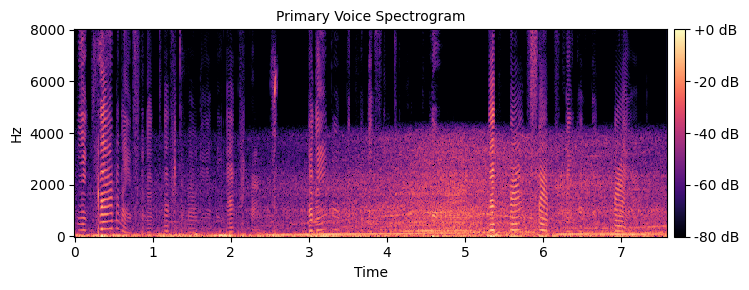

In [4]:
plot_spectrogram(d_primary, fs, "Primary Voice Spectrogram")

In [5]:

print("--- Input: Noisy referance Mic (Simulated) ---")
play_audio(x_reference, fs)

--- Input: Noisy referance Mic (Simulated) ---


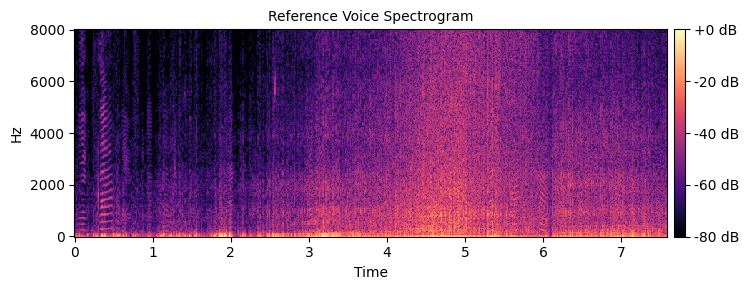

In [6]:
plot_spectrogram(x_reference, fs, "Reference Voice Spectrogram")

In [7]:
print("--- Output: Adaptive NLMS Result ---")
play_audio(normalize(y_cleaned), fs)

--- Output: Adaptive NLMS Result ---


In [8]:
res_ss = evaluate_method(clean,d_primary ,y_cleaned)
print("Spectral Subtraction")
print_results(res_ss)

Spectral Subtraction
SNR_in (dB)           : -1.148
SNR_out (dB)          : -0.352
SNR_improvement (dB)  : 0.796
Segmental_SNR (dB)    : -6.387
MSE                   : 0.010
LSD                   : 22.668


In [ ]:
clean, fs = load_audio("data/clean/clean_speech.wav")
noise, _ = load_audio("data/noise/traffic.wav")
noise_white = normalize(noise)
noisy_white, _ = mix_with_snr(clean, noise_white, snr_db=-5)

x_wdd = wiener_dd(noisy_white, fs)

print("Noisy")
play_audio(normalize(noisy_white), fs)

Noisy


In [10]:
play_audio(x_wdd, fs)

In [11]:
res_wdd = evaluate_method(clean,noisy_white ,x_wdd)
print("Adaptive Wiener")
print_results(res_wdd)

Adaptive Wiener
SNR_in (dB)           : 5.000
SNR_out (dB)          : 7.035
SNR_improvement (dB)  : 2.035
Segmental_SNR (dB)    : 3.279
MSE                   : 0.002
LSD                   : 17.476


In [12]:
from enhancement.wiener_static import wiener_filter_static

x_wss = wiener_filter_static(noisy_white, fs)
res_wss = evaluate_method(clean,noisy_white ,x_wss)
print("Static Wiener")
print_results(res_wss)

Static Wiener
SNR_in (dB)           : 5.000
SNR_out (dB)          : 7.631
SNR_improvement (dB)  : 2.631
Segmental_SNR (dB)    : 0.344
MSE                   : 0.002
LSD                   : 20.319


In [13]:
play_audio(x_wss, fs)

In [14]:
from enhancement.spectral_subtraction import spectral_subtraction

x_ss = spectral_subtraction(noisy_white, fs)
res_ss = evaluate_method(clean,noisy_white ,x_ss)
print("Spectral Substraction")
print_results(res_ss)

Spectral Substraction
SNR_in (dB)           : 5.000
SNR_out (dB)          : 8.768
SNR_improvement (dB)  : 3.768
Segmental_SNR (dB)    : 1.068
MSE                   : 0.001
LSD                   : 21.326
